In [418]:
import pandas as pd
df2015 = pd.read_csv("2015-building-energy-benchmarking.csv", sep=',')                                                                                     

In [419]:
df2016 = pd.read_csv("2016-building-energy-benchmarking.csv", sep=',') 

In [420]:
df2016 = df2016.rename(columns={'TotalGHGEmissions': 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity': 'GHGEmissionsIntensity(kgCO2e/ft2)'})

In [421]:
# Location df2015
# Latitude Longitude df2016
remove_characters = [" ", "{", "}", "'"]
latitude = []
longitude = []
for index, row in df2015.iterrows():
    value = row['Location']
    for character in remove_characters:
        value = value.replace(character, "")
    value = value.replace(',', ":")
    #print(value)
    tab = value.split(":")
    #print(tab)
    latitude.append(tab[1])
    longitude.append(tab[3])
    
df2015['Latitude'] = latitude   
df2015['Longitude'] = longitude 

In [422]:
df2015 = df2015.drop(columns=['Location', 'OtherFuelUse(kBtu)', 'DefaultData', 'Comment'])
df2015 = df2015.drop(columns=['ComplianceStatus', 'Outlier', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas'])
df2015 = df2015.drop(columns=['City Council Districts', 'SPD Beats', 'Zip Codes'])

df2016 = df2016.drop(columns=['Address', 'City', 'State', 'ZipCode'])
df2016 = df2016.drop(columns=['DefaultData', 'Comments', 'ComplianceStatus', 'Outlier'])

In [423]:
len(df2015.columns)

38

In [424]:
len(df2016.columns)

38

In [425]:
if set(df2015.columns) == set(df2016.columns):
    print('The two dataframes have strictly the same columns.')
else:
    print('Problem...')

The two dataframes have strictly the same columns.


In [426]:
dfReference = pd.concat([df2016,df2015], ignore_index=True)

In [427]:
dfReference.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2016,NonResidential,Hotel,Mayflower park hotel,0659000030,7,DOWNTOWN,47.6122,-122.33799,...,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,0659000220,7,DOWNTOWN,47.61317,-122.33393,...,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,0659000475,7,DOWNTOWN,47.61393,-122.3381,...,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,0659000640,7,DOWNTOWN,47.61412,-122.33664,...,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),0659000970,7,DOWNTOWN,47.61375,-122.34047,...,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88


In [428]:
dfReference.shape

(6716, 38)

In [429]:
dfReference = dfReference.drop_duplicates(
    subset=['OSEBuildingID'], keep="first")

In [430]:
dfReference.shape

(3432, 38)

In [431]:
print(dfReference['BuildingType'].unique())

['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA']


In [432]:
listBuildingTypeValues = ['NonResidential','Nonresidential COS','Nonresidential WA']
dfReference = dfReference[dfReference['BuildingType'].isin(listBuildingTypeValues)]

In [433]:
dfReference.shape

(1574, 38)

In [434]:
dfReference.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2016,NonResidential,Hotel,Mayflower park hotel,0659000030,7,DOWNTOWN,47.6122,-122.33799,...,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,0659000220,7,DOWNTOWN,47.61317,-122.33393,...,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,0659000475,7,DOWNTOWN,47.61393,-122.3381,...,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,0659000640,7,DOWNTOWN,47.61412,-122.33664,...,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),0659000970,7,DOWNTOWN,47.61375,-122.34047,...,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88


In [435]:
dfReference = dfReference.drop(columns=['PropertyName', 
                                        'TaxParcelIdentificationNumber',
                                       ])

In [436]:
from sklearn.preprocessing import LabelEncoder
print(dfReference['PrimaryPropertyType'].unique())
X = dfReference['PrimaryPropertyType']
le = LabelEncoder()
encoded = le.fit_transform(X)
dfReference['PrimaryPropertyType'] = encoded

['Hotel' 'Other' 'Mixed Use Property' 'University'
 'Small- and Mid-Sized Office' 'Self-Storage Facility' 'Warehouse'
 'K-12 School' 'Large Office' 'Senior Care Community' 'Medical Office'
 'Retail Store' 'Hospital' 'Residence Hall' 'Distribution Center'
 'Worship Facility' 'Supermarket / Grocery Store' 'Laboratory'
 'Refrigerated Warehouse' 'Restaurant' 'Low-Rise Multifamily' 'Office'
 'Non-Refrigerated Warehouse' 'Restaurant\n']


In [437]:
dfReference.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2016,NonResidential,2,7,DOWNTOWN,47.6122,-122.33799,1927,1.0,...,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83
1,2,2016,NonResidential,2,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,...,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86
2,3,2016,NonResidential,2,7,DOWNTOWN,47.61393,-122.3381,1969,1.0,...,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19
3,5,2016,NonResidential,2,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,...,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67
4,8,2016,NonResidential,2,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,...,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88


In [438]:
from sklearn.preprocessing import LabelEncoder
print(dfReference['BuildingType'].unique())
X = dfReference['BuildingType']
le = LabelEncoder()
encoded = le.fit_transform(X)
dfReference['BuildingType'] = encoded

['NonResidential' 'Nonresidential COS' 'Nonresidential WA']


In [439]:
from sklearn.preprocessing import LabelEncoder
print(dfReference['Neighborhood'].unique())
X = dfReference['Neighborhood']
le = LabelEncoder()
encoded = le.fit_transform(X)
dfReference['Neighborhood'] = encoded

['DOWNTOWN' 'NORTHEAST' 'EAST' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'MAGNOLIA / QUEEN ANNE' 'CENTRAL' 'SOUTHWEST' 'SOUTHEAST'
 'NORTH' 'DELRIDGE' 'North' 'Delridge' 'Ballard' 'Northwest' 'Central'
 'DELRIDGE NEIGHBORHOODS']


In [440]:
dfReference.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2016,0,2,7,6,47.6122,-122.33799,1927,1.0,...,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83
1,2,2016,0,2,7,6,47.61317,-122.33393,1996,1.0,...,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86
2,3,2016,0,2,7,6,47.61393,-122.3381,1969,1.0,...,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19
3,5,2016,0,2,7,6,47.61412,-122.33664,1926,1.0,...,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67
4,8,2016,0,2,7,6,47.61375,-122.34047,1980,1.0,...,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88


In [441]:
dfReference.isnull().sum().sum()

5989

In [442]:
listNaN = dfReference.columns[dfReference.isna().any()].tolist()

In [443]:
print(listNaN)

['NumberofBuildings', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)']


In [444]:
for colName in listNaN:
  ratio = (dfReference[colName].isna().sum() / len(dfReference)) * 100
  print(colName + ": " + str(ratio) + " %")

NumberofBuildings: 0.12706480304955528 %
ListOfAllPropertyUseTypes: 0.5082592121982211 %
LargestPropertyUseType: 0.7623888182973316 %
LargestPropertyUseTypeGFA: 0.7623888182973316 %
SecondLargestPropertyUseType: 45.80686149936468 %
SecondLargestPropertyUseTypeGFA: 45.80686149936468 %
ThirdLargestPropertyUseType: 77.89072426937739 %
ThirdLargestPropertyUseTypeGFA: 77.89072426937739 %
YearsENERGYSTARCertified: 94.15501905972046 %
ENERGYSTARScore: 34.9428208386277 %
SiteEUI(kBtu/sf): 0.1905972045743329 %
SiteEUIWN(kBtu/sf): 0.1905972045743329 %
SourceEUI(kBtu/sf): 0.12706480304955528 %
SourceEUIWN(kBtu/sf): 0.12706480304955528 %
SiteEnergyUse(kBtu): 0.12706480304955528 %
SiteEnergyUseWN(kBtu): 0.1905972045743329 %
SteamUse(kBtu): 0.12706480304955528 %
Electricity(kWh): 0.12706480304955528 %
Electricity(kBtu): 0.12706480304955528 %
NaturalGas(therms): 0.12706480304955528 %
NaturalGas(kBtu): 0.12706480304955528 %
GHGEmissions(MetricTonsCO2e): 0.12706480304955528 %
GHGEmissionsIntensity(kgCO

In [445]:
dfReference = dfReference.drop(columns=['SecondLargestPropertyUseType', 
                                        'SecondLargestPropertyUseTypeGFA',
                                        'ThirdLargestPropertyUseType',
                                        'ThirdLargestPropertyUseTypeGFA',
                                        'ListOfAllPropertyUseTypes' # complicate to manage
                                       ])

In [446]:
dfReference.shape

(1574, 31)

In [447]:
from sklearn.preprocessing import LabelEncoder
print(dfReference['LargestPropertyUseType'].unique())
X = dfReference['LargestPropertyUseType']
le = LabelEncoder()
encoded = le.fit_transform(X)
dfReference['LargestPropertyUseType'] = encoded

['Hotel' 'Police Station' 'Other - Entertainment/Public Assembly'
 'Library' 'Fitness Center/Health Club/Gym' 'Social/Meeting Hall'
 'Courthouse' 'Other' 'College/University' 'Automobile Dealership'
 'Office' 'Self-Storage Facility' 'Non-Refrigerated Warehouse'
 'K-12 School' 'Other - Mall' 'Senior Care Community' 'Medical Office'
 'Retail Store' 'Hospital (General Medical & Surgical)' 'Museum'
 'Repair Services (Vehicle, Shoe, Locksmith, etc)'
 'Other - Lodging/Residential' 'Residence Hall/Dormitory'
 'Other/Specialty Hospital' 'Financial Office' 'Distribution Center'
 'Parking' 'Multifamily Housing' 'Worship Facility' 'Restaurant'
 'Data Center' 'Laboratory' 'Supermarket/Grocery Store'
 'Convention Center' 'Urgent Care/Clinic/Other Outpatient' nan
 'Other - Services' 'Strip Mall' 'Wholesale Club/Supercenter'
 'Refrigerated Warehouse' 'Manufacturing/Industrial Plant'
 'Other - Recreation' 'Lifestyle Center' 'Other - Public Services'
 'Other - Education' 'Fire Station' 'Performing Arts

In [448]:
listNaN = dfReference.columns[dfReference.isna().any()].tolist()
print(listNaN)

['NumberofBuildings', 'LargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)']


In [450]:
for colName in listNaN:
  #print(colName)
  median = dfReference[colName].median(skipna=True)
  #print(median)
  dfReference[colName]=dfReference[colName].fillna(median)

In [451]:
dfReference.isnull().sum().sum()

0

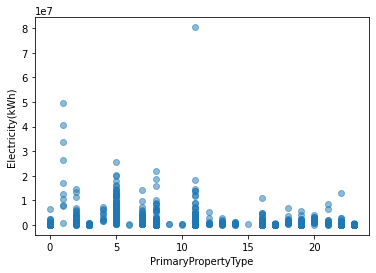

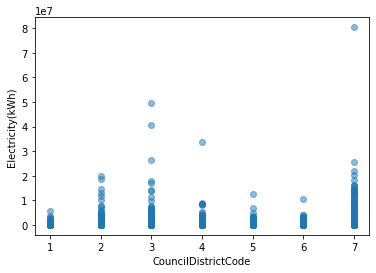

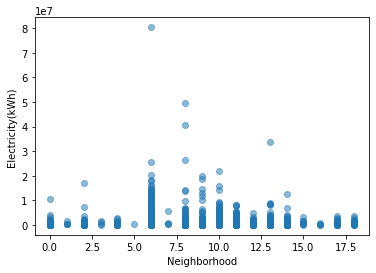

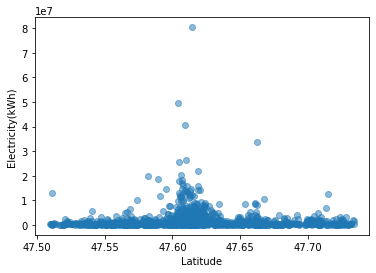

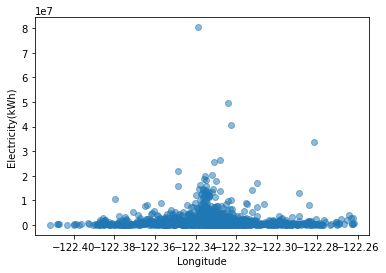

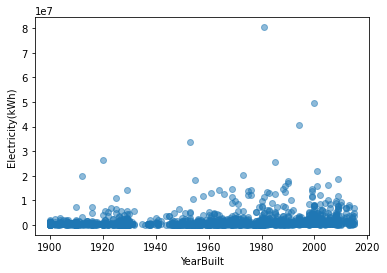

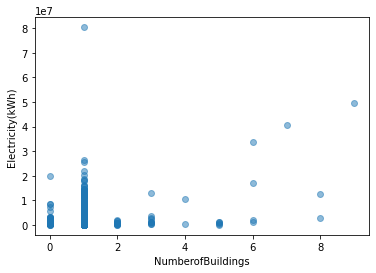

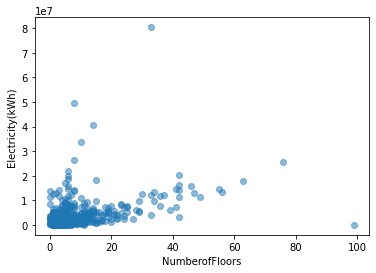

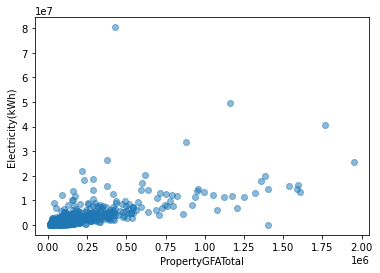

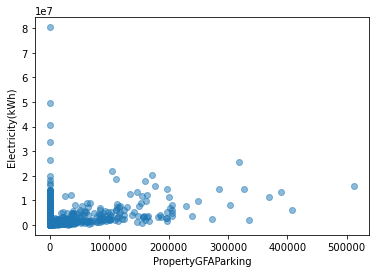

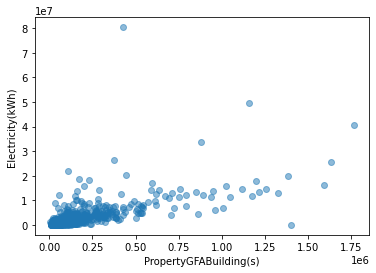

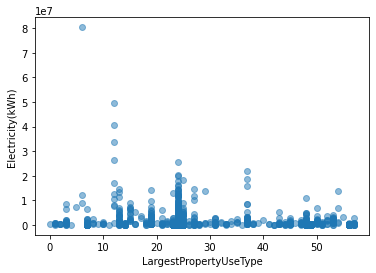

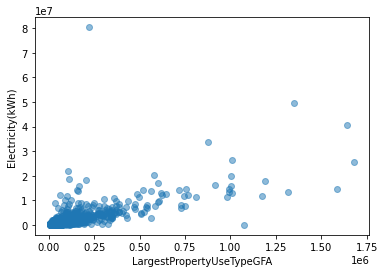

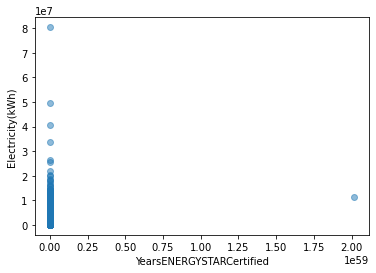

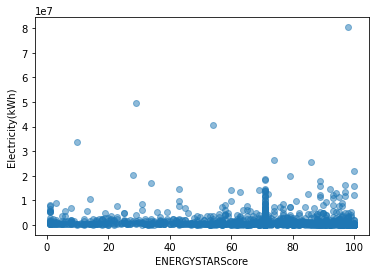

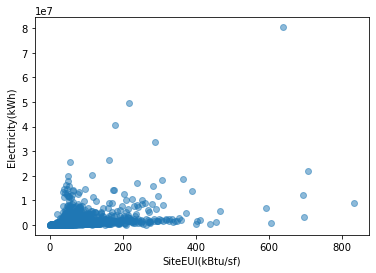

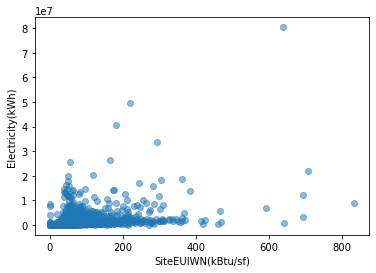

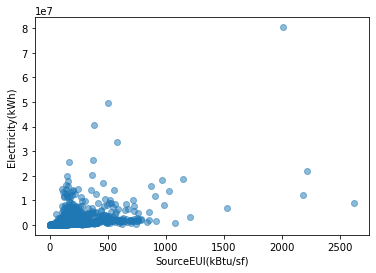

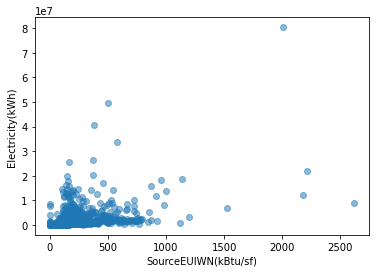

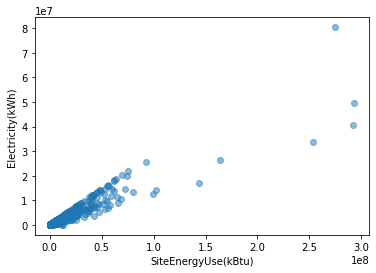

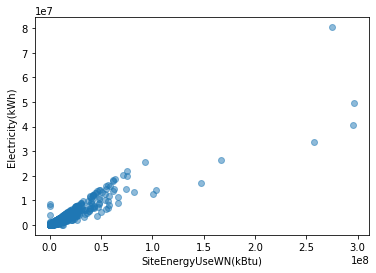

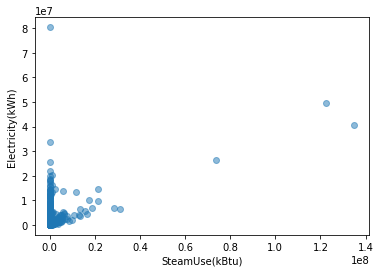

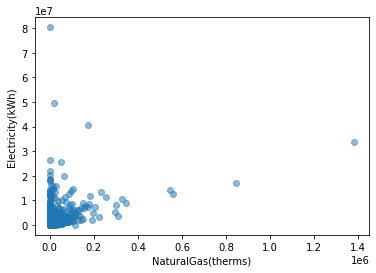

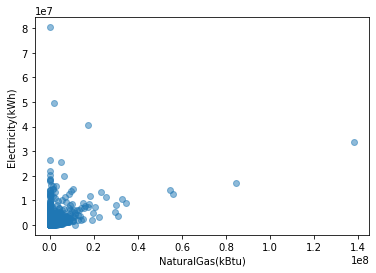

In [462]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 'DataYear', 'BuildingType', 
cols = ['PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'NaturalGas(therms)',
       'NaturalGas(kBtu)']

for colname in cols:
    plt.plot(dfReference[colname],dfReference["Electricity(kWh)"],'o',alpha=0.5)
    plt.xlabel(colname)
    plt.ylabel("Electricity(kWh)")
    plt.show()

In [463]:
dfReference.to_csv('P3_cleaaned.csv')

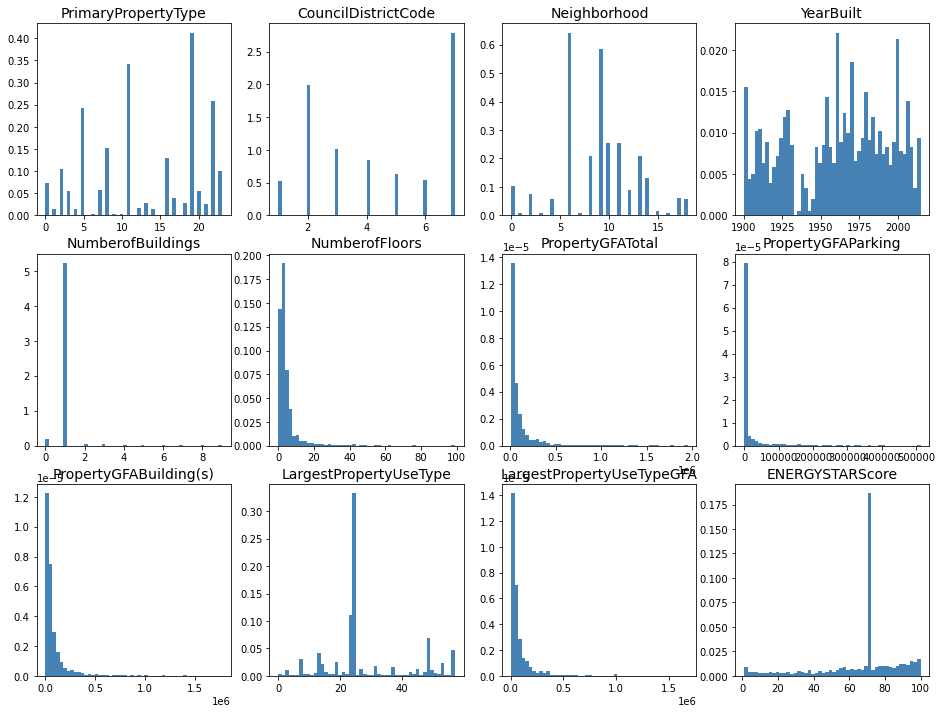

In [477]:
fig = plt.figure(figsize=(16, 12))
feat_idx = 0
cols = ['PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore']
for colname in cols:
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(dfReference[colname], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(colname, fontsize=14)
    feat_idx = feat_idx + 1